## Statistics Assignment

All of the following are based on data from your project. Each student has to perform analysis on their own no collaboration between team members. Here are the datasets to be analyzed by team datasets:

***
### ***For Part 1 and 2***

##### Library-Computer-Usage-Analysis
* Computer Utilization Data by Date-Time

##### Volag
* Flight Delay Data by Date-Time

##### Slipper-Streets
* Crash Data by Date-Time

##### Corpus
* Reviews of Electronic product (laptop) by Date-Time

##### SteamConnect
* Early Access Score by Release Date-Time

##### Toxic-Crusaders
* Chemical Industry Release (pick a particular industry) by Date-Time

##### Uni-X
* Repayment Rate for Female gender by Date-Time

##### WRF
* Migration count by Date-Time


### Part 1

* **Conduct Decriptive Analytics (Mean, Median, Quartile) calculation by each division of Date-Time (most probably year or 6 month duration, if you have shorter use 1 month)**
* **Calculate divergence of mean and median in your data**
* **Visualize the data and draw inferences**

### Part 2
* **Conduct Probablity distibution analysis based on the data. Analyze your data based on the type of distribution it best fits (for PDF and CDF)**
* **Conduct Method of Moments analysis on your data to suggest the best fit distribution. Visualize the results**

***
***

### ***For Part 3***
* Compare with the variable with other variables in your project

### Part 3
* **Formulate a null hypothesis and evaluate it, perform correlation measures, and construct a linear regression model**

***

In [215]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

## Do some more data wrangling

In [216]:
#path = os.path.join('..','Data','flights_weather.csv')
path = os.path.join('..','Data','flights_weather_1.csv')

'''
t_df = pd.read_csv(path, low_memory=False, chunksize=1000)
t_df.get_chunk(10000)
'''

'\nt_df = pd.read_csv(path, low_memory=False, chunksize=1000)\nt_df.get_chunk(10000)\n'

### Our dataset is a little bit large

Since our dataset grew to about 2GB in size after merging it with the weather data, it's a bit much to load into
the memory of my system and also process. For that reason, a random sample of the dataset should be taken. 

In [217]:
#lines = sum(1 for l in open(path))

with open(path) as f:
    lines = sum(1 for l in f)
    
# sample ~30% of the dataset
sample_size = int(lines / 30)
skip = random.sample(range(1,lines), lines - sample_size)
# use skip lines
sample = pd.read_csv(path, skiprows=skip, dtype='str')

In [218]:
#sample = sample.loc[:, ~sample.columns.str.contains('^Unnamed')]
sample = sample[~sample.WEATHER_DELAY.isnull()]
#chunk.drop(['YEAR','MONTH','DAY','OR_MAX','OR_MIN','DES_MAX','DES_MIN'],axis=1)

In [219]:
sample.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IATA_CODE_x,origin_weather_station,IATA_CODE_y,destination_weather_station,OR_TEMP,OR_COUNT_TEMP,OR_DEWP,OR_COUNT_DEWP,OR_SLP,OR_COUNT_SLP,OR_STP,OR_COUNT_STP,OR_VISIB,OR_COUNT_VISIB,OR_WDSP,OR_COUNT_WDSP,OR_MXSPD,OR_GUST,OR_MAX,OR_MIN,OR_PRCP,OR_SNDP,OR_FRSHTT,DES_TEMP,DES_COUNT_TEMP,DES_DEWP,DES_COUNT_DEWP,DES_SLP,DES_COUNT_SLP,DES_STP,DES_COUNT_STP,DES_VISIB,DES_COUNT_VISIB,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP,DES_FRSHTT
2,102,2015,1,1,4,UA,1577,N69813,SMF,DEN,0538,0634,56.0,26.0,0700,142.0,164.0,129.0,909,1009,9.0,0900,1018,78.0,0,0,NaN,22.0,0.0,56.0,0.0,0.0,2015-01-01,SMF,724839-93225,DEN,725650-03017,38.4,24.0,26.9,24.0,1020.0,22.0,1019.0,24.0,7.6,24.0,4.2,24.0,15.0,999.9,53.1,26.1,0.00G,999.9,100000,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,999.9,30.0,-13.0,0.00G,5.9,001000
15,446,2015,1,1,4,B6,1554,N760JB,SJU,FLL,0610,0625,15.0,13.0,0638,163.0,167.0,147.0,1046,0805,7.0,0753,0812,19.0,0,0,NaN,4.0,0.0,15.0,0.0,0.0,2015-01-01,SJU,785263-11641,FLL,747830-12849,79.6,20.0,72.6,20.0,1019.4,20.0,1019.3,20.0,9.6,20.0,7.2,20.0,15.0,19.0,84.9*,75.0*,0.01G,999.9,000000,73.0,24.0,69.9,24.0,1020.9,20.0,1020.6,24.0,8.2,24.0,4.2,24.0,12.0,15.0,80.1,69.1,0.01G,999.9,010000
17,465,2015,1,1,4,WN,1966,N466WN,CMH,ATL,0615,0831,136.0,13.0,0844,110.0,90.0,65.0,447,0949,12.0,0805,1001,116.0,0,0,NaN,0.0,0.0,116.0,0.0,0.0,2015-01-01,CMH,724280-14821,ATL,722190-13874,25.0,24.0,9.2,24.0,1023.4,24.0,992.5,24.0,10.0,24.0,10.7,24.0,18.1,26.0,37.0,15.1,0.00G,999.9,000000,42.5,24.0,27.9,24.0,1027.3,24.0,989.3,24.0,10.0,24.0,3.7,24.0,7.0,999.9,57.9,32.0,0.00G,999.9,000000
23,567,2015,1,1,4,DL,2234,N970DL,BWI,MSP,0625,0709,44.0,10.0,0719,171.0,163.0,149.0,936,0848,4.0,0816,0852,36.0,0,0,NaN,0.0,0.0,36.0,0.0,0.0,2015-01-01,BWI,724060-93721,MSP,726580-14922,29.3,24.0,12.7,24.0,1022.4,24.0,1016.5,24.0,10.0,24.0,3.2,24.0,11.1,17.1,43.0,17.1,0.00G,999.9,000000,17.7,24.0,9.9,24.0,1015.1,23.0,983.2,24.0,9.9,24.0,8.8,24.0,12.0,18.1,30.0*,10.0*,0.00G,3.1,001000
25,620,2015,1,1,4,F9,295,N202FR,TPA,DEN,0630,0750,80.0,13.0,0803,245.0,234.0,214.0,1506,0937,7.0,0835,0944,69.0,0,0,NaN,0.0,0.0,69.0,0.0,0.0,2015-01-01,TPA,722110-12842,DEN,725650-03017,63.1,24.0,56.8,24.0,1023.7,18.0,1023.3,24.0,9.1,24.0,6.1,24.0,9.9,999.9,73.9,59.0,0.00G,999.9,000000,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,999.9,30.0,-13.0,0.00G,5.9,001000


We need to replace some values in our sample. A value of 999.9~ means that there was not a recorded value for that particular day. So, for precipitation we will replace non-recordings with 0, and for the other values such as wind speed and temperature it makes more sense to replace them with the mean value of the values which aren't 999.9~

In [220]:
flags = ['A','B','C','D','E','F', 'G', 'H', 'I']
sample['OR_PRCP'] = sample['OR_PRCP'].apply(lambda x: str(x)[:-1] if str(x)[-1] in flags else str(x))
sample['DES_PRCP'] = sample['DES_PRCP'].apply(lambda x: str(x)[:-1] if str(x)[-1] in flags else str(x))

In [221]:
sample.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IATA_CODE_x,origin_weather_station,IATA_CODE_y,destination_weather_station,OR_TEMP,OR_COUNT_TEMP,OR_DEWP,OR_COUNT_DEWP,OR_SLP,OR_COUNT_SLP,OR_STP,OR_COUNT_STP,OR_VISIB,OR_COUNT_VISIB,OR_WDSP,OR_COUNT_WDSP,OR_MXSPD,OR_GUST,OR_MAX,OR_MIN,OR_PRCP,OR_SNDP,OR_FRSHTT,DES_TEMP,DES_COUNT_TEMP,DES_DEWP,DES_COUNT_DEWP,DES_SLP,DES_COUNT_SLP,DES_STP,DES_COUNT_STP,DES_VISIB,DES_COUNT_VISIB,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP,DES_FRSHTT
2,102,2015,1,1,4,UA,1577,N69813,SMF,DEN,0538,0634,56.0,26.0,0700,142.0,164.0,129.0,909,1009,9.0,0900,1018,78.0,0,0,NaN,22.0,0.0,56.0,0.0,0.0,2015-01-01,SMF,724839-93225,DEN,725650-03017,38.4,24.0,26.9,24.0,1020.0,22.0,1019.0,24.0,7.6,24.0,4.2,24.0,15.0,999.9,53.1,26.1,0.00,999.9,100000,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,999.9,30.0,-13.0,0.00,5.9,001000
15,446,2015,1,1,4,B6,1554,N760JB,SJU,FLL,0610,0625,15.0,13.0,0638,163.0,167.0,147.0,1046,0805,7.0,0753,0812,19.0,0,0,NaN,4.0,0.0,15.0,0.0,0.0,2015-01-01,SJU,785263-11641,FLL,747830-12849,79.6,20.0,72.6,20.0,1019.4,20.0,1019.3,20.0,9.6,20.0,7.2,20.0,15.0,19.0,84.9*,75.0*,0.01,999.9,000000,73.0,24.0,69.9,24.0,1020.9,20.0,1020.6,24.0,8.2,24.0,4.2,24.0,12.0,15.0,80.1,69.1,0.01,999.9,010000
17,465,2015,1,1,4,WN,1966,N466WN,CMH,ATL,0615,0831,136.0,13.0,0844,110.0,90.0,65.0,447,0949,12.0,0805,1001,116.0,0,0,NaN,0.0,0.0,116.0,0.0,0.0,2015-01-01,CMH,724280-14821,ATL,722190-13874,25.0,24.0,9.2,24.0,1023.4,24.0,992.5,24.0,10.0,24.0,10.7,24.0,18.1,26.0,37.0,15.1,0.00,999.9,000000,42.5,24.0,27.9,24.0,1027.3,24.0,989.3,24.0,10.0,24.0,3.7,24.0,7.0,999.9,57.9,32.0,0.00,999.9,000000
23,567,2015,1,1,4,DL,2234,N970DL,BWI,MSP,0625,0709,44.0,10.0,0719,171.0,163.0,149.0,936,0848,4.0,0816,0852,36.0,0,0,NaN,0.0,0.0,36.0,0.0,0.0,2015-01-01,BWI,724060-93721,MSP,726580-14922,29.3,24.0,12.7,24.0,1022.4,24.0,1016.5,24.0,10.0,24.0,3.2,24.0,11.1,17.1,43.0,17.1,0.00,999.9,000000,17.7,24.0,9.9,24.0,1015.1,23.0,983.2,24.0,9.9,24.0,8.8,24.0,12.0,18.1,30.0*,10.0*,0.00,3.1,001000
25,620,2015,1,1,4,F9,295,N202FR,TPA,DEN,0630,0750,80.0,13.0,0803,245.0,234.0,214.0,1506,0937,7.0,0835,0944,69.0,0,0,NaN,0.0,0.0,69.0,0.0,0.0,2015-01-01,TPA,722110-12842,DEN,725650-03017,63.1,24.0,56.8,24.0,1023.7,18.0,1023.3,24.0,9.1,24.0,6.1,24.0,9.9,999.9,73.9,59.0,0.00,999.9,000000,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,999.9,30.0,-13.0,0.00,5.9,001000


In [222]:
# for the sake of simplicity, because our data set is huge and still pretty messy, just replace
# all 999.9 or 9999.9 values with 0
for col in sample.columns:
    sample[col] = sample[col].replace(999.9,0)
    sample[col] = sample[col].replace(9999.9,0)
    sample[col] = sample[col].replace('999.9','0')
    sample[col] = sample[col].replace('9999.9','0')
       
sample.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IATA_CODE_x,origin_weather_station,IATA_CODE_y,destination_weather_station,OR_TEMP,OR_COUNT_TEMP,OR_DEWP,OR_COUNT_DEWP,OR_SLP,OR_COUNT_SLP,OR_STP,OR_COUNT_STP,OR_VISIB,OR_COUNT_VISIB,OR_WDSP,OR_COUNT_WDSP,OR_MXSPD,OR_GUST,OR_MAX,OR_MIN,OR_PRCP,OR_SNDP,OR_FRSHTT,DES_TEMP,DES_COUNT_TEMP,DES_DEWP,DES_COUNT_DEWP,DES_SLP,DES_COUNT_SLP,DES_STP,DES_COUNT_STP,DES_VISIB,DES_COUNT_VISIB,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP,DES_FRSHTT
2,102,2015,1,1,4,UA,1577,N69813,SMF,DEN,0538,0634,56.0,26.0,0700,142.0,164.0,129.0,909,1009,9.0,0900,1018,78.0,0,0,NaN,22.0,0.0,56.0,0.0,0.0,2015-01-01,SMF,724839-93225,DEN,725650-03017,38.4,24.0,26.9,24.0,1020.0,22.0,1019.0,24.0,7.6,24.0,4.2,24.0,15.0,0,53.1,26.1,0.00,0,100000,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,0,30.0,-13.0,0.00,5.9,001000
15,446,2015,1,1,4,B6,1554,N760JB,SJU,FLL,0610,0625,15.0,13.0,0638,163.0,167.0,147.0,1046,0805,7.0,0753,0812,19.0,0,0,NaN,4.0,0.0,15.0,0.0,0.0,2015-01-01,SJU,785263-11641,FLL,747830-12849,79.6,20.0,72.6,20.0,1019.4,20.0,1019.3,20.0,9.6,20.0,7.2,20.0,15.0,19.0,84.9*,75.0*,0.01,0,000000,73.0,24.0,69.9,24.0,1020.9,20.0,1020.6,24.0,8.2,24.0,4.2,24.0,12.0,15.0,80.1,69.1,0.01,0,010000
17,465,2015,1,1,4,WN,1966,N466WN,CMH,ATL,0615,0831,136.0,13.0,0844,110.0,90.0,65.0,447,0949,12.0,0805,1001,116.0,0,0,NaN,0.0,0.0,116.0,0.0,0.0,2015-01-01,CMH,724280-14821,ATL,722190-13874,25.0,24.0,9.2,24.0,1023.4,24.0,992.5,24.0,10.0,24.0,10.7,24.0,18.1,26.0,37.0,15.1,0.00,0,000000,42.5,24.0,27.9,24.0,1027.3,24.0,989.3,24.0,10.0,24.0,3.7,24.0,7.0,0,57.9,32.0,0.00,0,000000
23,567,2015,1,1,4,DL,2234,N970DL,BWI,MSP,0625,0709,44.0,10.0,0719,171.0,163.0,149.0,936,0848,4.0,0816,0852,36.0,0,0,NaN,0.0,0.0,36.0,0.0,0.0,2015-01-01,BWI,724060-93721,MSP,726580-14922,29.3,24.0,12.7,24.0,1022.4,24.0,1016.5,24.0,10.0,24.0,3.2,24.0,11.1,17.1,43.0,17.1,0.00,0,000000,17.7,24.0,9.9,24.0,1015.1,23.0,983.2,24.0,9.9,24.0,8.8,24.0,12.0,18.1,30.0*,10.0*,0.00,3.1,001000
25,620,2015,1,1,4,F9,295,N202FR,TPA,DEN,0630,0750,80.0,13.0,0803,245.0,234.0,214.0,1506,0937,7.0,0835,0944,69.0,0,0,NaN,0.0,0.0,69.0,0.0,0.0,2015-01-01,TPA,722110-12842,DEN,725650-03017,63.1,24.0,56.8,24.0,1023.7,18.0,1023.3,24.0,9.1,24.0,6.1,24.0,9.9,0,73.9,59.0,0.00,0,000000,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,0,30.0,-13.0,0.00,5.9,001000


In [223]:
s = sample['WEATHER_DELAY'].apply(float)
s.max()

966.0

We write the sample to a new file after creating it and cleaning it up a bit.

In [224]:
sample.to_csv(os.path.join('..','Data','fw_sample.csv'))

In [225]:
fw_samp = pd.read_csv(os.path.join('..','Data','fw_sample.csv'), low_memory=False)
fw_samp = fw_samp.drop([
    'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
    'ORIGIN_AIRPORT',
    'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
    'IATA_CODE_x', 'origin_weather_station',
    'IATA_CODE_y', 'destination_weather_station',
    'DES_FRSHTT','OR_FRSHTT', 'DESTINATION_AIRPORT'
], axis=1)
fw_samp = fw_samp.loc[:, ~fw_samp.columns.str.contains('^Unnamed')]
fw_samp.head()

,YEAR,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,OR_TEMP,OR_COUNT_TEMP,OR_DEWP,OR_COUNT_DEWP,OR_SLP,OR_COUNT_SLP,OR_STP,OR_COUNT_STP,OR_VISIB,OR_COUNT_VISIB,OR_WDSP,OR_COUNT_WDSP,OR_MXSPD,OR_GUST,OR_MAX,OR_MIN,OR_PRCP,OR_SNDP,DES_TEMP,DES_COUNT_TEMP,DES_DEWP,DES_COUNT_DEWP,DES_SLP,DES_COUNT_SLP,DES_STP,DES_COUNT_STP,DES_VISIB,DES_COUNT_VISIB,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP
0,2015,1,1,538,634,56.0,26.0,700,142.0,164.0,129.0,909,1009,9.0,900,1018,78.0,22.0,0.0,56.0,0.0,0.0,2015-01-01,38.4,24.0,26.9,24.0,1020.0,22.0,1019.0,24.0,7.6,24.0,4.2,24.0,15.0,0.0,53.1,26.1,0.00,0.0,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,0.0,30.0,-13.0,0.00,5.9
1,2015,1,1,610,625,15.0,13.0,638,163.0,167.0,147.0,1046,805,7.0,753,812,19.0,4.0,0.0,15.0,0.0,0.0,2015-01-01,79.6,20.0,72.6,20.0,1019.4,20.0,1019.3,20.0,9.6,20.0,7.2,20.0,15.0,19.0,84.9*,75.0*,0.01,0.0,73.0,24.0,69.9,24.0,1020.9,20.0,1020.6,24.0,8.2,24.0,4.2,24.0,12.0,15.0,80.1,69.1,0.01,0.0
2,2015,1,1,615,831,136.0,13.0,844,110.0,90.0,65.0,447,949,12.0,805,1001,116.0,0.0,0.0,116.0,0.0,0.0,2015-01-01,25.0,24.0,9.2,24.0,1023.4,24.0,992.5,24.0,10.0,24.0,10.7,24.0,18.1,26.0,37.0,15.1,0.00,0.0,42.5,24.0,27.9,24.0,1027.3,24.0,989.3,24.0,10.0,24.0,3.7,24.0,7.0,0.0,57.9,32.0,0.00,0.0
3,2015,1,1,625,709,44.0,10.0,719,171.0,163.0,149.0,936,848,4.0,816,852,36.0,0.0,0.0,36.0,0.0,0.0,2015-01-01,29.3,24.0,12.7,24.0,1022.4,24.0,1016.5,24.0,10.0,24.0,3.2,24.0,11.1,17.1,43.0,17.1,0.00,0.0,17.7,24.0,9.9,24.0,1015.1,23.0,983.2,24.0,9.9,24.0,8.8,24.0,12.0,18.1,30.0*,10.0*,0.00,3.1
4,2015,1,1,630,750,80.0,13.0,803,245.0,234.0,214.0,1506,937,7.0,835,944,69.0,0.0,0.0,69.0,0.0,0.0,2015-01-01,63.1,24.0,56.8,24.0,1023.7,18.0,1023.3,24.0,9.1,24.0,6.1,24.0,9.9,0.0,73.9,59.0,0.00,0.0,12.1,24.0,-1.2,24.0,1023.9,24.0,832.9,24.0,10.0,24.0,7.8,24.0,13.0,0.0,30.0,-13.0,0.00,5.9


Below we can see that for the month of October we don't have any values for OR_TEMP and OR_PRCP. Which is going to cause a discontinuity in some of our plots.

In [226]:
g = fw_samp.groupby('MONTH')
stats = g.describe()
g.get_group(10)[[
    'OR_TEMP',
    'OR_PRCP',
    'DES_TEMP',
    'DES_PRCP'
]].count()

OR_TEMP     0
OR_PRCP     0
DES_TEMP    0
DES_PRCP    0
dtype: int64

Since the dataset has a little over 70 variables, let's just take a look at a few variable for now. In particular we want to look at the delay time attributed to weather factors, and various flight origin weather factors.

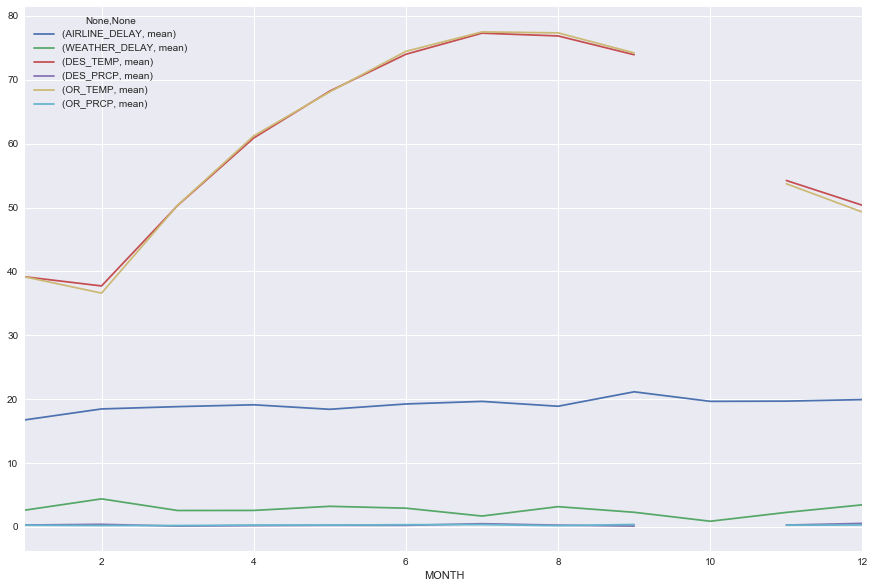

In [227]:
stats[[
    ('AIRLINE_DELAY','mean'),
    ('WEATHER_DELAY','mean'),
    ('DES_TEMP','mean'),
    ('DES_PRCP','mean'),
    ('OR_TEMP','mean'),
    ('OR_PRCP','mean')
]].plot(figsize=(15,10))

From the above plots, we can see that, interestingly enough the mean of the origin temp and the departure delay both seem to peak in the summer months. It's seems that high temperatures may have the biggest impact on delay time, when considering how weather impacts flight delay.

So, we might want to take a closer look at the relationship between the temperature and the delay time. We can also tell from the above plot that out of the total time of delay, a small amount of it can be attributed to weather delays. In the future it may be better to look at the airline and aircraft factors themselves rather than trying to correlate with weather. 

We should also note that we seem to be missing weather data for the month of October, which means that we have a 
disconitnuity in our data.

Below we plot just the mean and the median of the variables DEPARTURE_DELAY and OR_TEMP together. We can see that,
the mean and median of the OR_TEMP have a pretty low deviation from one another, whereas the mean and median of the
DEPARTURE_DELAY have quite a lot divergence from one another.

We could interpret this as meaning that the OR_TEMP is a relatively uniformly distributed set of points, with few outliers since median is resistant to outliers and mean is highly influenced by them. The opposite would be true for 
the DEPARTURE_DELAY.

Let's now compute the divergence of median/mean.

$$Median_n - Mean_n$$

Below we compute the divergences of both the origin temperature and the departure delay. 
From the plot we can see that in origin temperature infact lies closer to 0 than departure delay. Providing us with more 
evidence that origin temperature is less skewed than the departure time which varies quite wildily under 0. The fact that it is below zero let's us know that the median is on average less that the mean. meaning that the mean may be affected by some high outliers.

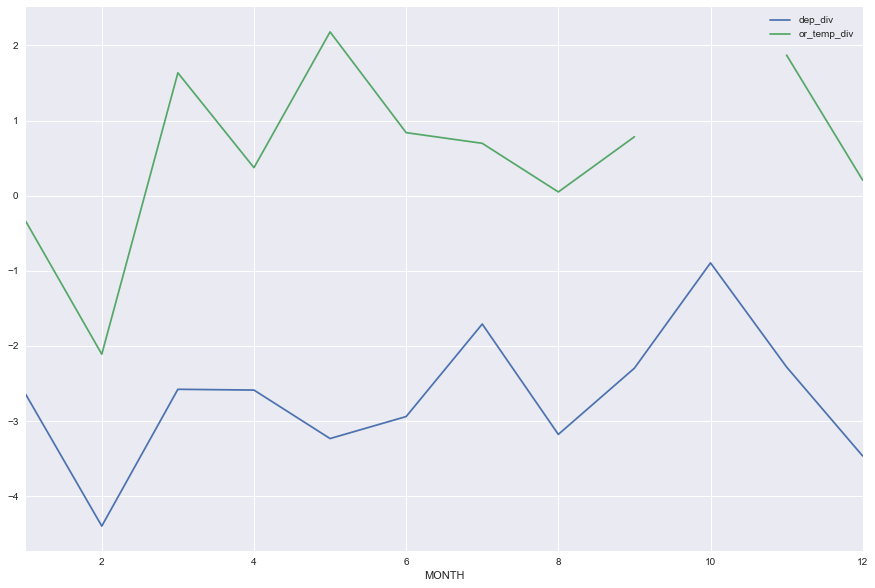

In [228]:
dep_div = stats['WEATHER_DELAY','50%'] - stats['WEATHER_DELAY','mean']
or_temp_div = stats['OR_TEMP','50%'] - stats['OR_TEMP','mean'] 
div_df = pd.concat(dict(dep_div = dep_div, or_temp_div = or_temp_div),axis=1)
div_df.plot(figsize=(15,10))

From the above plot of the divergences of the weather delay and the origin temperatures we can see that the share similar shapes howeverbeing that the divergence of the origin temp is centered more around 0 whereas the weather delay diveregence is negative for all months, implies that temp recordings are more in line with the mean for any given month, where as the weather_delay value, must have other variables impacting it's value skewing it away from the mean values.  

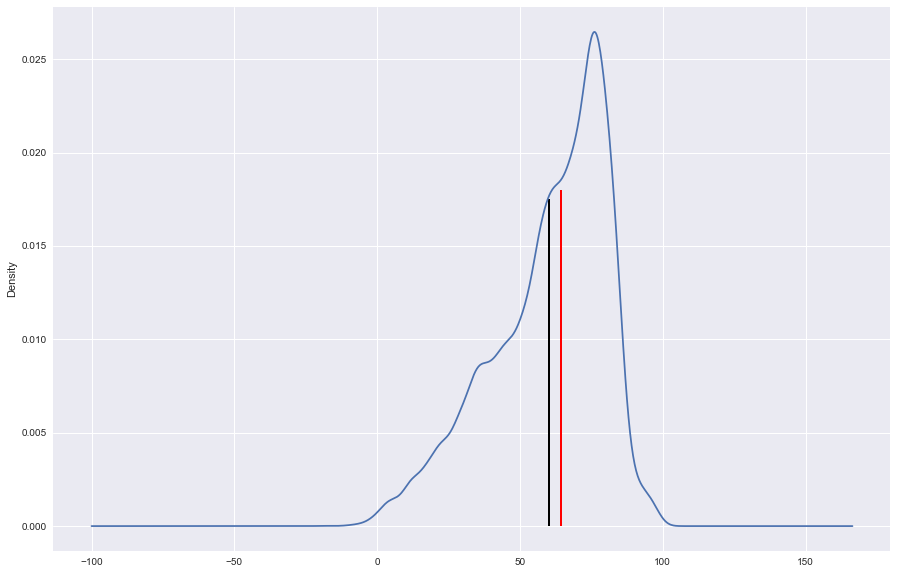

In [229]:
data = fw_samp['OR_TEMP']

data.plot(kind="density",
              figsize=(15,10))

plt.vlines(data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.0175,
           linewidth=2.0)

plt.vlines(data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.018, 
           linewidth=2.0,
           color="red")

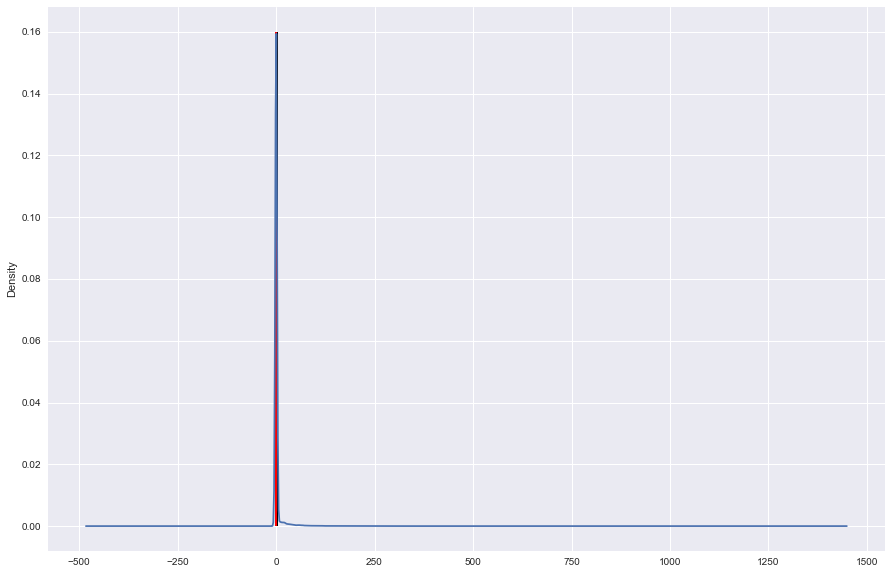

In [230]:
data = fw_samp['WEATHER_DELAY']

data.plot(kind="density",
              figsize=(15,10))

plt.vlines(data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.16,
           linewidth=2.0)

plt.vlines(data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.16, 
           linewidth=2.0,
           color="red")

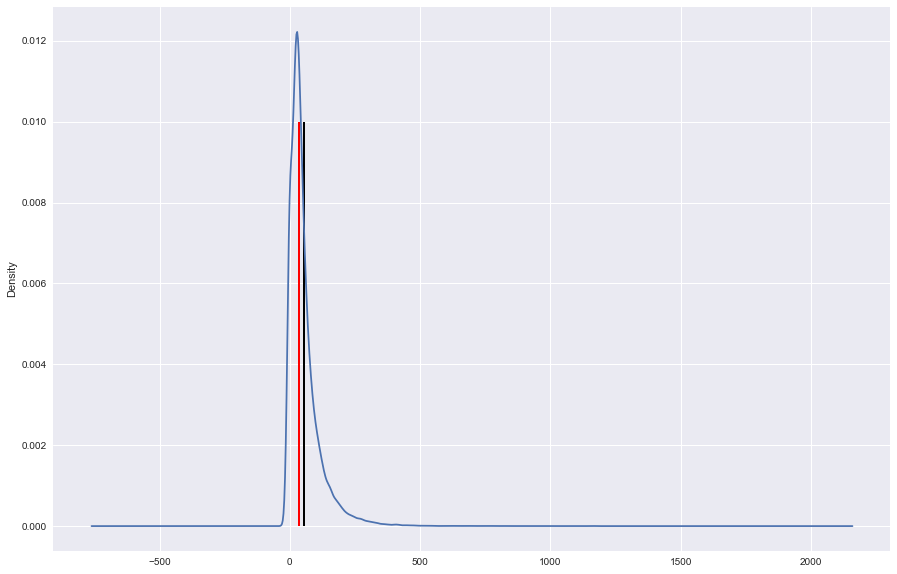

In [231]:
data = fw_samp['DEPARTURE_DELAY']

data.plot(kind="density",
              figsize=(15,10))

plt.vlines(data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.010,
           linewidth=2.0)

plt.vlines(data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.010, 
           linewidth=2.0,
           color="red")

In the above plots, we visiualize the divergence (difference between median and mean) as a red and black line, respectively on the density curve of each variable. Both OR_TEMP and DEPARTURE_DELAY have relatively readable density curves and low divergence. 

If we look closer at the WEATHER_DELAY variable we can see that it's mean, median, and most of it's values are concentrated around 0. This means that we mostly have 0's in our data for that variable. 

We may be better off looking exclusively at flights which have a non-zero positive value for delay time attributed to weather. 

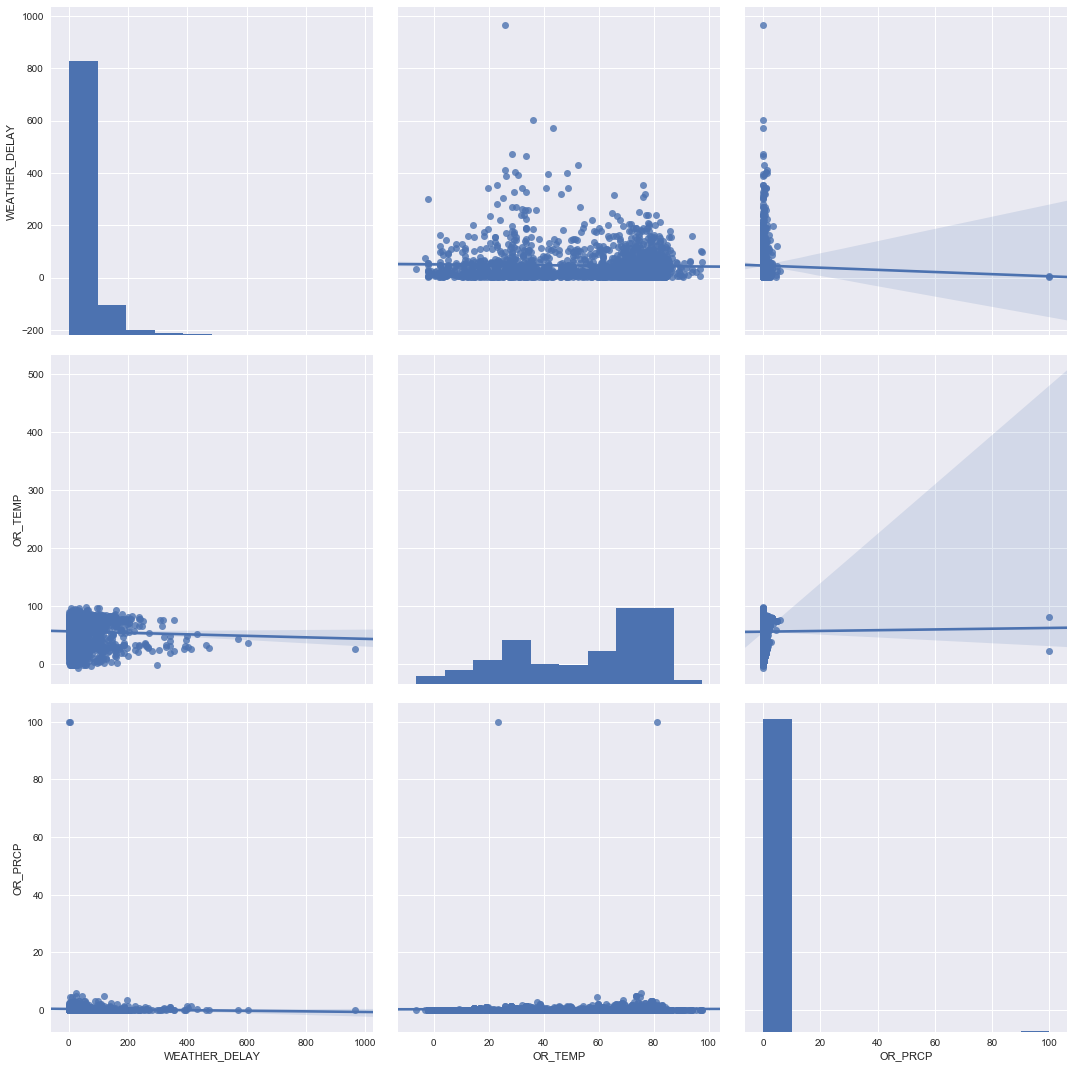

In [232]:
fw_samp = fw_samp[fw_samp['WEATHER_DELAY'] >= 1]
sns.pairplot(
    fw_samp[[
        'WEATHER_DELAY','OR_TEMP','OR_PRCP'
    ]].dropna(),
    kind='reg',
    size=5
)

In [233]:
# compute the percentage of flights with delay time which can be attributed to weather.

sample.WEATHER_DELAY = sample.WEATHER_DELAY.apply(float)
sample.DEPARTURE_DELAY = sample.DEPARTURE_DELAY.apply(float)

(sample[sample.WEATHER_DELAY >=1 ].size /
 sample[sample.DEPARTURE_DELAY >= 1].size) * 100

6.7659385318770635

Producing a pair plot of the temperature data versus the origin temperature reaffirms that origin temperature likely has a larger impact on the weather delay than percipitation does. However, it's tough to draw any concrete conclusions regarding the effects of weather on the flight delays, because of the fact that the weather data we have is daily not hourly. Weather which happened in the evening would affect flight data that was recoreded in the morning. We also fit a 
linear regression to our pair plots, which further shows us just how skewed our data is, and how small an impact weather has on the over all sample and possibly the population of flight data as a whole.

Regardless, we will continue to look at how weather impacts the flights.

### Probability Distribution Analysis

We want to conduct a probablility analysis on our variables from above. With this we can try and see what shape our data takes and if it can be fit to any standard, well known distributions. With this we can determine approximate probablilities of an observation being delayed by some amount of time, by taking the area under the curve over some interval of observation data. 

Let's start off by visualizing the distributions of weather delay vs origin temperature and weather delay vs origin percipitaion.

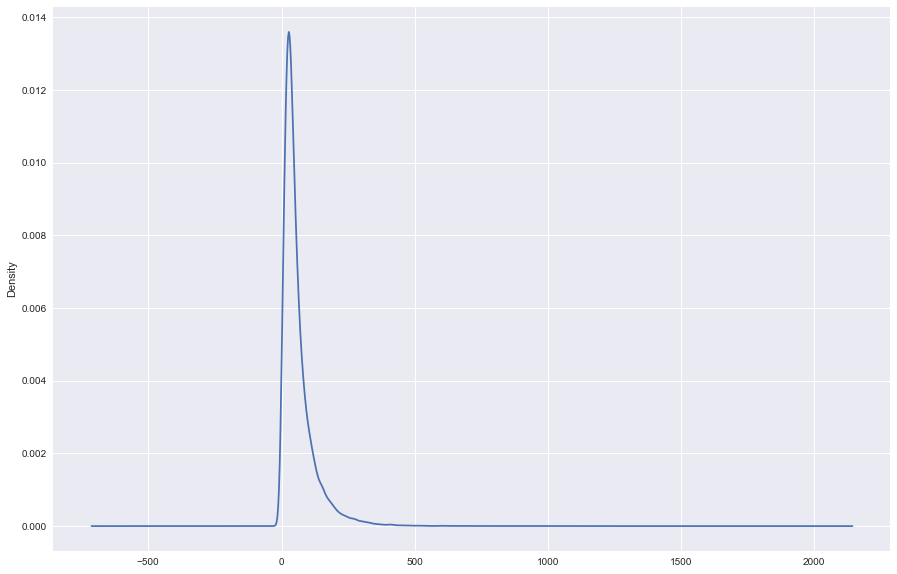

In [234]:
data = sample[sample['DEPARTURE_DELAY'] >= 1]['DEPARTURE_DELAY']
data.plot(kind='density',figsize=(15,10))

MONTH
1     37.276316
10    33.500000
11    56.358696
12    59.457447
2     45.710098
3     59.474820
4     39.488636
5     48.796020
6     42.378788
7     32.639344
8     51.105820
9     42.372727
Name: WEATHER_DELAY, dtype: float64
MONTH
1     0.458054
10    0.872955
11    0.353730
12    0.483944
2     0.546225
3     0.304279
4     0.625350
5     0.914360
6     0.892493
7     0.965748
8     1.072783
9     0.880051
Name: WEATHER_DELAY, dtype: float64 MONTH
1      81.379825
10     38.375387
11    159.327025
12    122.860227
2      83.683630
3     195.461680
4      63.146409
5      53.366303
6      47.483591
7      33.796971
8      47.638523
9      48.148011
Name: WEATHER_DELAY, dtype: float64


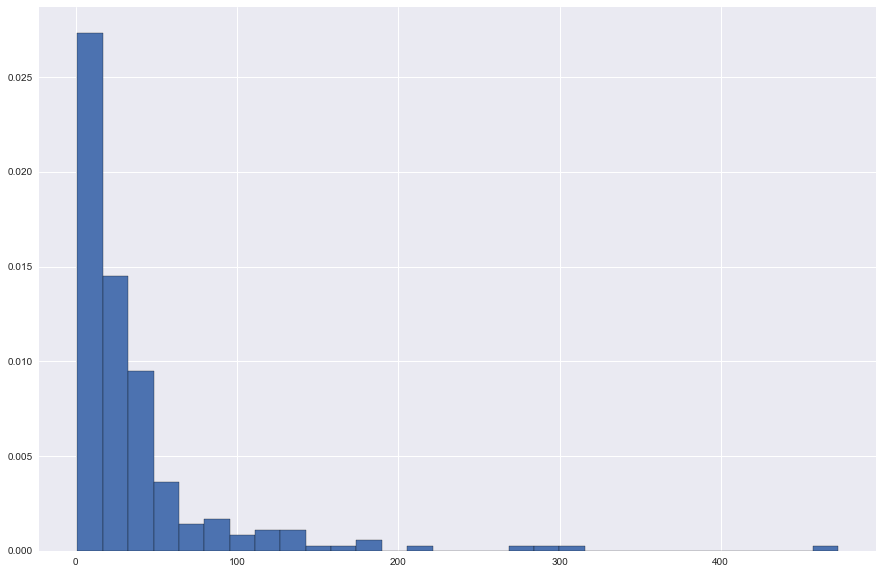

In [348]:
s = sample[sample['WEATHER_DELAY'] >= 1][['DEPARTURE_DELAY', 'WEATHER_DELAY', 'OR_TEMP', 'OR_PRCP', 'MONTH']]

s['OR_TEMP'] = s['OR_TEMP'].apply(float)
s['OR_PRCP'] = s['OR_PRCP'].apply(float)

s['OR_TEMP'].fillna(s['OR_TEMP'].mean(), inplace=True)
s['OR_PRCP'].fillna(s['OR_PRCP'].mean(), inplace=True)

g = s.groupby('MONTH')
mean_by_month = g.mean()
var_by_month = g.var()

jan_delays = g.get_group('1')

# compute the moments
delay_mean = g.WEATHER_DELAY.mean()
delay_var = g.WEATHER_DELAY.var()

alpha_mom =  delay_mean ** 2 / delay_var
beta_mom = delay_var / delay_mean

from scipy.stats.distributions import gamma

jan_delays.WEATHER_DELAY.hist(normed=True, bins=30, ec='black', figsize=(15,10))

print(delay_mean)
print(alpha_mom,beta_mom)

By creating a density plot of the WEATHER_DELAY data which are greater than 0 we can see that it is heaviliy skewed towards the left. The data is also continuous, which means that it may be a good fit for a gamma distribution.

Let's conduct a method of moments analysis.

In [236]:
# compute the mean
g = 
mean = data.mean()
mean

SyntaxError: invalid syntax (<ipython-input-236-591531db4ab1>, line 2)